In [ ]:
# 1. Install & Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt




In [2]:
# 2. Upload dan Baca Dataset
from google.colab import files
uploaded = files.upload()  # Upload file: Heart_disease_cleveland_new.csv

df = pd.read_csv('/content/Heart_disease_cleveland_new.csv')
df.head()


Saving Heart_disease_cleveland_new.csv to Heart_disease_cleveland_new (1).csv


NameError: name 'pd' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# 3. Preprocessing Data
# Cek missing value
print("Missing values:\n", df.isnull().sum())

# (Jika ada missing value, isi atau drop)
df = df.dropna()

# Cek info dan label unqiue
print(df.info())
print("Unique target values:", df['target'].unique())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 3

In [ ]:
# 4. Pisahkan fitur dan label
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
 #5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Buat Model Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [ ]:
# 7. Evaluasi Model
y_pred = dt_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.7868852459016393
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
           1       0.95      0.62      0.75        32

    accuracy                           0.79        61
   macro avg       0.83      0.80      0.78        61
weighted avg       0.83      0.79      0.78        61



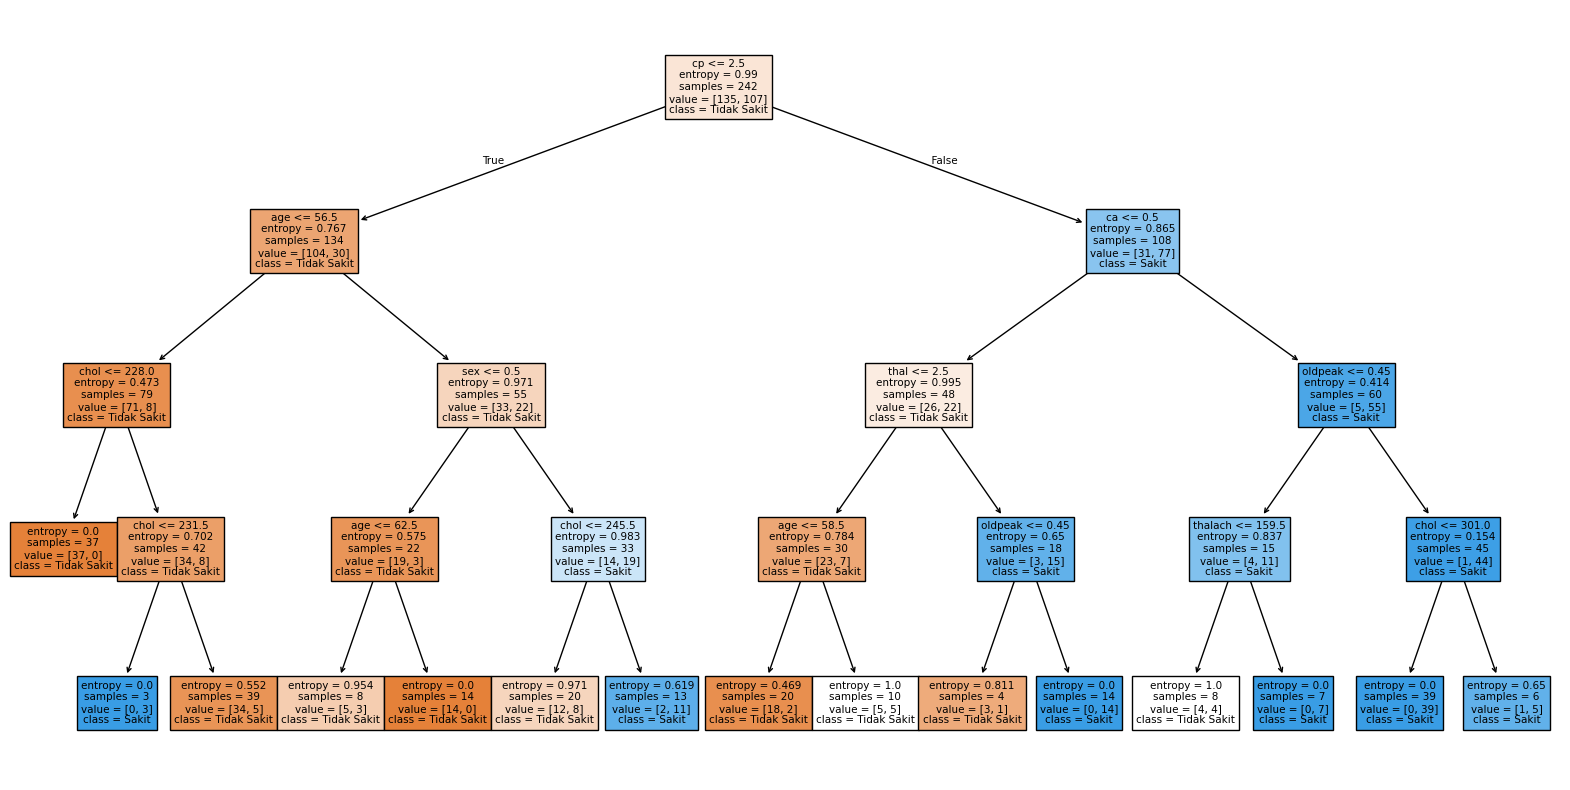

In [ ]:
# 8. Visualisasi Pohon Keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Tidak Sakit', 'Sakit'], filled=True)
plt.show()

In [ ]:
  # 9. Sistem Rekomendasi Sederhana
def rekomendasi(prediksi):
    if prediksi == 1:
        return "Pasien berisiko terkena penyakit jantung. Rekomendasi: Periksa ke dokter, hindari makanan tinggi kolesterol, olahraga teratur."
    else:
        return "Risiko rendah. Tetap jaga pola hidup sehat dan rutin cek kesehatan."

In [ ]:
# 10. Contoh Prediksi dan Rekomendasi
contoh = X_test.iloc[5]
prediksi = dt_model.predict([contoh])[0]
print("Prediksi:", "Sakit" if prediksi==1 else "Tidak Sakit")
print("Rekomendasi:", rekomendasi(prediksi))

Prediksi: Sakit
Rekomendasi: Pasien berisiko terkena penyakit jantung. Rekomendasi: Periksa ke dokter, hindari makanan tinggi kolesterol, olahraga teratur.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
